In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from ucimlrepo import fetch_ucirepo 

import gudhi

import sys
sys.path.append('..')

from topomap import TopoMap

In [3]:
def plot_persistance_diagrams_projection(X, proj, y, y_column='class'):
    rips_original = gudhi.RipsComplex(points=X)
    st_original = rips_original.create_simplex_tree(max_dimension=1)

    rips_proj = gudhi.RipsComplex(points=proj)
    st_projection = rips_proj.create_simplex_tree(max_dimension=1)

    diag_original = st_original.persistence(min_persistence=0)
    diag_proj = st_projection.persistence(min_persistence=0)

    I_original = st_original.persistence_intervals_in_dimension(0)
    I_proj = st_projection.persistence_intervals_in_dimension(0)

    bt_blobs = gudhi.bottleneck_distance(I_original, I_proj)
    print(f"Bottleneck distance: {bt_blobs:.10f}")    

    # Create image
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    gudhi.plot_persistence_diagram(diag_original, axes=axs[0])
    axs[0].set_title('Persistance - Original Points')

    gudhi.plot_persistence_diagram(diag_proj, axes=axs[1])
    axs[1].set_title('Persistance - Projections')

    colors = [px.colors.qualitative.D3[i] for i in range(10)]

    i = 0
    for cluster in y[y_column].unique():
        i_cluster = list(y[y[y_column]==cluster].index)
        axs[2].scatter(proj[i_cluster,0], proj[i_cluster,1],
                c=colors[i], s=5)
        i += 1
    axs[2].set_xticks([])
    axs[2].set_yticks([])
    axs[2].set_title('Projection')
    
    fig.suptitle('Persistence diagrams and Projection')
    fig.tight_layout()
    
    return fig

## Iris

In [4]:
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
X = X.to_numpy()
y = iris.data.targets 

In [5]:
topomap_iris = TopoMap()
proj_iris = topomap_iris.fit_transform(X)

Bottleneck distance: 0.0500000000


c:\Users\felip\Documents\Github\TopoMap\venv\lib\site-packages\gudhi\persistence_graphical_tools.py:105: UserWarning: This function is not available.
ModuleNotFoundError: No module named 'matplotlib'.
  warnings.warn(f"This function is not available.\nModuleNotFoundError: No module named '{import_error.name}'.")


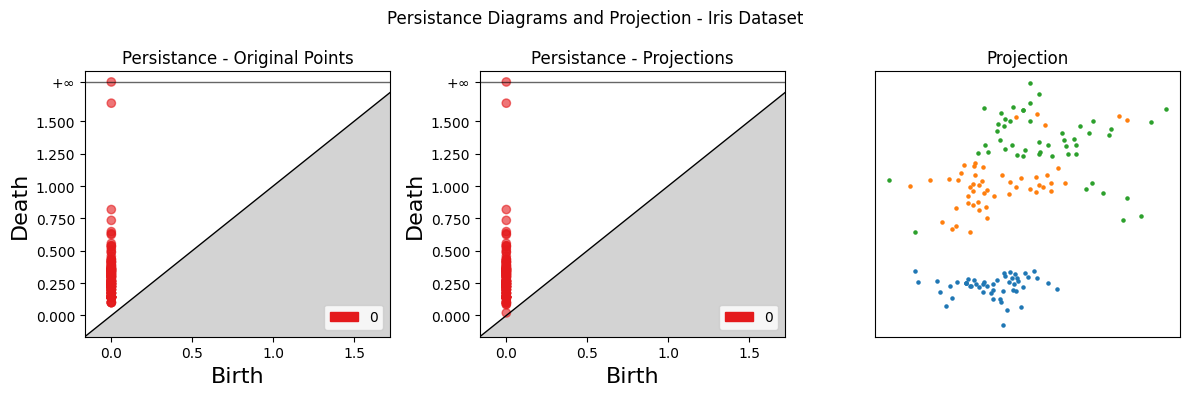

In [6]:
fig_iris = plot_persistance_diagrams_projection(X, proj_iris, y)
fig_iris.suptitle('Persistance Diagrams and Projection - Iris Dataset')
plt.show()

## Seeds

In [6]:
data_seeds = pd.read_csv('../data/UCI/seeds/seeds_dataset.txt', sep='\t',
                         header=None,
                         names=['x1','x2','x3','x4','x5','x6','x7','class'])

X_seeds = data_seeds.copy().drop(['class'], axis=1)
X_seeds = X_seeds.to_numpy()
y_seeds = data_seeds[['class']]

In [7]:
topomap_seeds = TopoMap()
proj_seeds = topomap_seeds.fit_transform(X_seeds)

Bottleneck distance: 0.0000000000


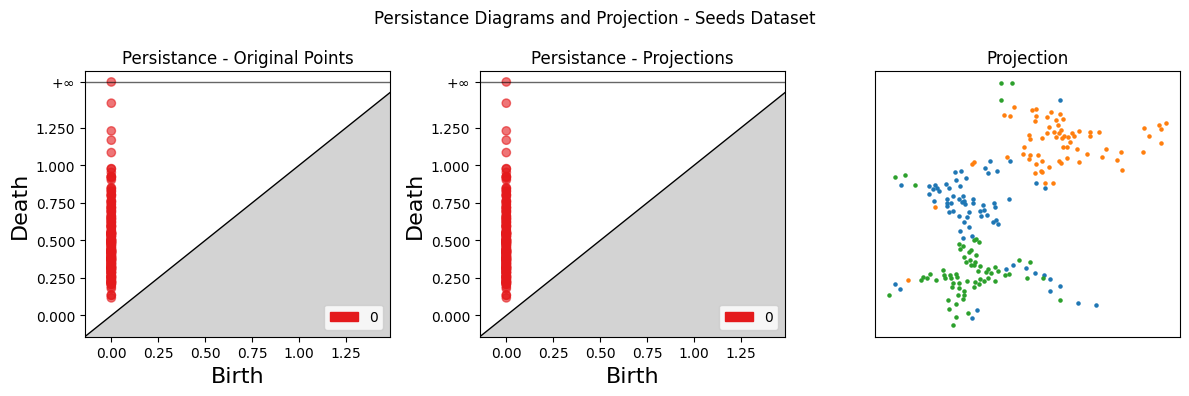

In [8]:
fig_seeds = plot_persistance_diagrams_projection(X_seeds, proj_seeds, y_seeds)
fig_seeds.suptitle('Persistance Diagrams and Projection - Seeds Dataset')
plt.show()

## MFeat

In [9]:
data_mfeat = pd.read_csv('../data/UCI/multiple+features/mfeat-kar', sep='\s+',
                         header=None,
                         names=['x'+str(i) for i in range(1,65)])
data_mfeat['class'] = 0
for i, row in data_mfeat.iterrows():
    data_mfeat.loc[i,'class'] = i//200

X_mfeat = data_mfeat.drop(['class'], axis=1)
X_mfeat = X_mfeat.to_numpy()
y_mfeat = data_mfeat[['class']]

In [10]:
topomap_mfeat = TopoMap()
proj_mfeat = topomap_mfeat.fit_transform(X_mfeat)

Bottleneck distance: 0.0000000000


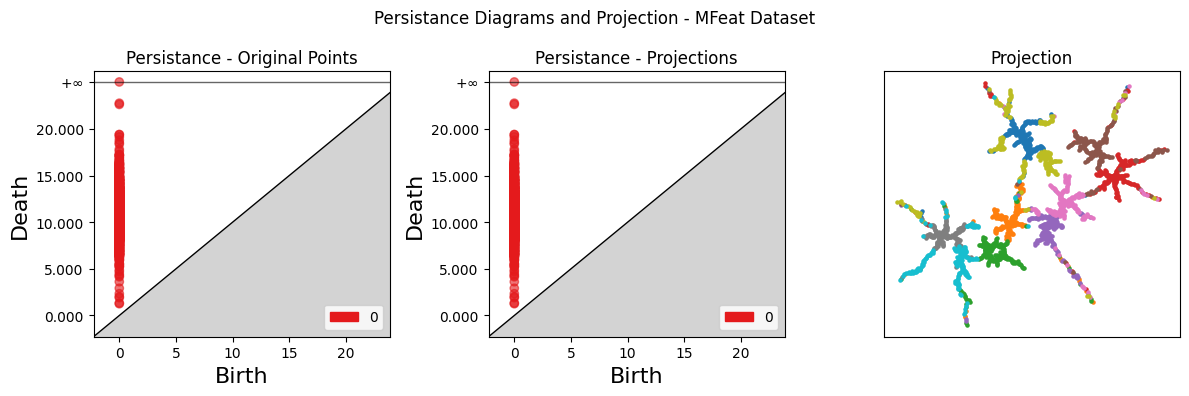

In [11]:
fig_mfeat = plot_persistance_diagrams_projection(X_mfeat, proj_mfeat, y_mfeat)
fig_mfeat.suptitle('Persistance Diagrams and Projection - MFeat Dataset')
plt.show()